In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Loading Data

In [3]:
input_test = pd.read_csv("test.csv")
input_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
input_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
train_data = pd.read_csv("train.csv")
train_data.info()
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
output_test = pd.read_csv("gender_submission.csv")
output_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Checking Coorrelation

<Axes: >

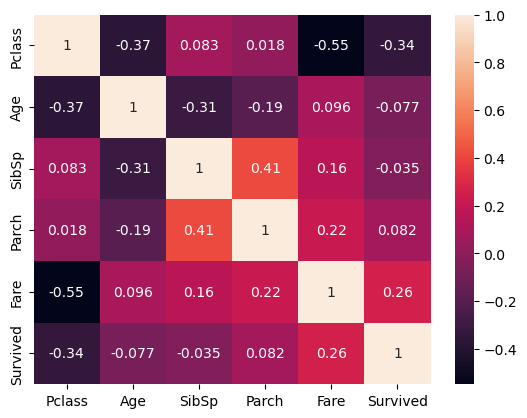

In [7]:
sns.heatmap(train_data[["Pclass", "Age", "SibSp", "Parch", "Fare", "Survived"]].corr(), annot= True)

# Sibsb - Number of Siblings

<Axes: xlabel='SibSp', ylabel='Survived'>

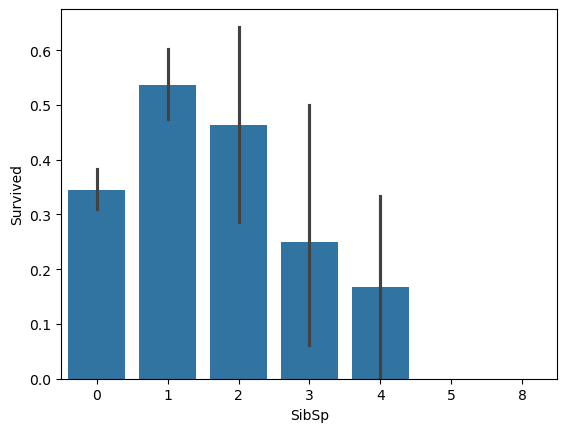

In [8]:
sns.barplot(x = "SibSp", y = "Survived", data = train_data)
# Those with high siblings value hass less chance to survive

# Age Parameter

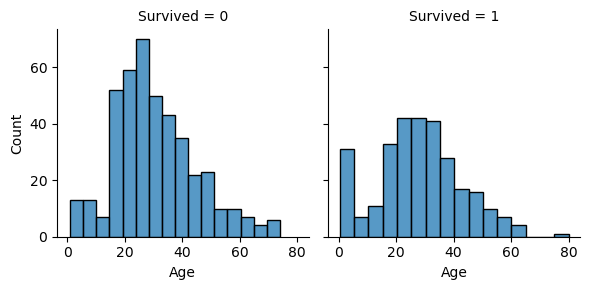

In [9]:
age_visuals = sns.FacetGrid(train_data, col = "Survived").map(sns.histplot, "Age")
#less age people have more chances of survival

# Gender Parameter

<Axes: xlabel='Sex', ylabel='Survived'>

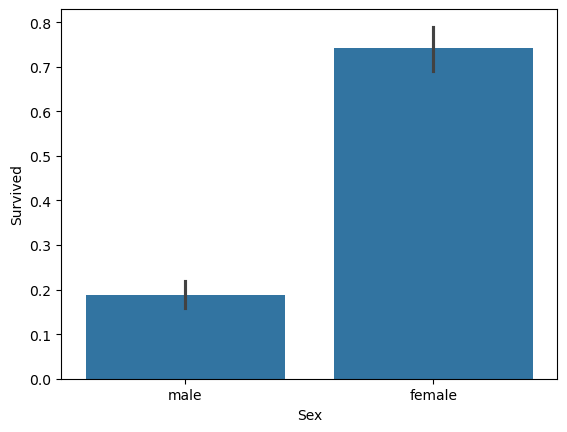

In [10]:
sns.barplot(x = "Sex", y = "Survived", data = train_data)
# females have more chances

# Pclass Parameter

<Axes: xlabel='Pclass', ylabel='Survived'>

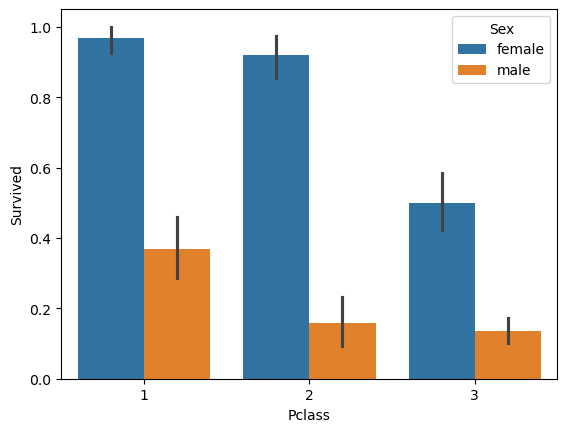

In [11]:
sns.barplot(x = "Pclass", y = "Survived", data =  train_data, hue = "Sex")
# 1st class means rich people have more chances

# Embarked

In [12]:
# There are some null values so i have to fill these null values with something

In [13]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
# Most of them are S, so i will fill these two null values with S
train_data["Embarked"] = train_data["Embarked"].fillna("S")

<Axes: xlabel='Embarked', ylabel='Survived'>

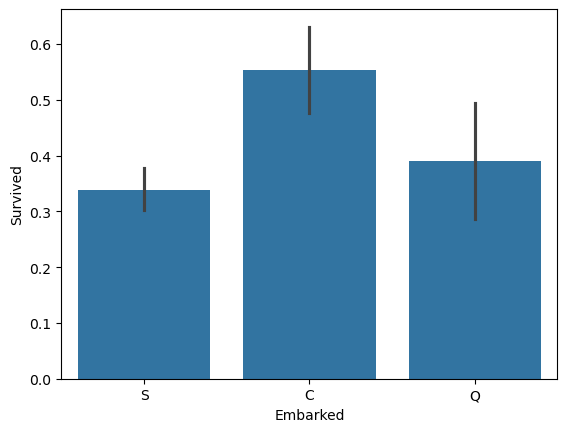

In [15]:
sns.barplot(x = "Embarked", y = "Survived", data = train_data)

In [16]:
# Here people from C Ship stop they are rich and mostly are female thus they have some effect on survival rate otherwise they are of no use

# Preparing The ML Model

In [17]:
# First fix all the null values

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
mean = train_data["Age"].mean()
std = train_data["Age"].std()
no_of_null = train_data["Age"].isnull().sum()

In [20]:
print(mean, std, no_of_null)

29.69911764705882 14.526497332334044 177


In [21]:
random_age = np.random.randint(mean-std, mean+std, size = no_of_null)

In [22]:
random_age

array([30, 21, 15, 36, 15, 37, 28, 38, 29, 16, 39, 36, 31, 33, 37, 15, 16,
       27, 23, 22, 32, 17, 27, 17, 22, 26, 28, 25, 41, 41, 27, 24, 25, 40,
       42, 20, 28, 20, 41, 33, 36, 37, 19, 30, 17, 28, 23, 21, 43, 24, 31,
       40, 16, 41, 37, 35, 43, 41, 16, 21, 43, 38, 39, 38, 35, 40, 26, 17,
       32, 43, 27, 34, 28, 21, 23, 31, 41, 21, 29, 28, 42, 28, 35, 28, 36,
       29, 25, 43, 31, 23, 36, 26, 43, 29, 30, 17, 27, 17, 26, 15, 34, 33,
       27, 17, 40, 35, 40, 25, 21, 19, 23, 18, 35, 29, 23, 27, 23, 39, 16,
       28, 43, 29, 41, 42, 37, 36, 32, 32, 33, 15, 26, 39, 37, 39, 41, 37,
       38, 30, 40, 43, 22, 18, 32, 25, 39, 38, 17, 20, 29, 16, 38, 36, 21,
       31, 26, 40, 30, 19, 32, 25, 31, 27, 15, 41, 24, 25, 42, 33, 27, 38,
       42, 28, 40, 19, 19, 38, 21])

In [23]:
mean_test = input_test["Age"].mean()
std_test = input_test["Age"].std()
nullval = input_test["Age"].isnull().sum()
random_age_test = np.random.randint(mean_test-std_test, mean_test+std_test, nullval)

In [24]:
a = train_data["Age"].copy()
a[np.isnan(a)] = random_age
train_data["Age"] = a
train_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
a = input_test["Age"].copy()
a[np.isnan(a)] = random_age_test
input_test["Age"] = a
input_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,31.0,0,0,359309,8.0500,NaN,S


In [26]:
train_data = train_data.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis = 1)
train_data
input_test = input_test.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis = 1)

In [27]:
gender = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(gender)
train_data["Sex"]
input_test["Sex"] = input_test["Sex"].map(gender)

In [28]:
ports = {"S": 0, "C": 1, "Q": 2}
train_data["Embarked"] = train_data["Embarked"].map(ports)
train_data["Embarked"]
input_test["Embarked"] = input_test["Embarked"].map(ports)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [29]:
input_test["Fare"] = input_test["Fare"].fillna(35.627188489208635)
input_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Spillting the data

In [30]:
x = train_data.drop(["Survived"], axis = 1)
y = train_data["Survived"]
x_test = input_test

# Scalling the data

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x)
x_test = ss.fit_transform(x_test)
y_test = output_test.drop(["PassengerId"], axis = 1)

In [46]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


# Classification

In [47]:
logistic_classifier = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()

In [48]:
logistic_classifier.fit(x_train, y)
svc_classifier.fit(x_train, y)
dt_classifier.fit(x_train, y)
knn_classifier.fit(x_train, y)
rf_classifier.fit(x_train, y)

RandomForestClassifier()

In [49]:
log_pred = logistic_classifier.predict(x_test)
svc_pred = svc_classifier.predict(x_test)
dt_pred = dt_classifier.predict(x_test)
knn_pred = knn_classifier.predict(x_test)
rf_pred = rf_classifier.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
log_acc = accuracy_score(y_test, log_pred)
svc_acc = accuracy_score(svc_pred, y_test)
dt_acc = accuracy_score(dt_pred, y_test)
knn_acc = accuracy_score(knn_pred, y_test)
rf_acc = accuracy_score(rf_pred, y_test)

In [51]:
print(log_acc)
print(svc_acc)
print(dt_acc)
print(knn_acc)
print(rf_acc)

0.9330143540669856
0.9019138755980861
0.8277511961722488
0.8444976076555024
0.8516746411483254
